# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [3]:
import urllib.request

aws_url = 'https://s3-us-west-1.amazonaws.com/udacity-selfdrivingcar/traffic-signs-data.zip'
zip_filename = "data/traffic-signs-data.zip"

urllib.request.urlretrieve(aws_url, zip_filename)

('data/traffic-signs-data.zip', <http.client.HTTPMessage at 0x7ff760167ac8>)

In [4]:
import zipfile
directory_to_extract_to = "data"
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file  = 'data/train.p'
validation_file= 'data/valid.p'
testing_file   = 'data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).shape[0]

print("Number of training examples =", n_train)
print("Number of testing examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
import numpy as np

def plot_images(images, titles, cmaps):
    f, axs = plt.subplots(1, len(images), figsize=(24, 9))
    for idx, image in enumerate(images):
        axs[idx].imshow(image, cmap=cmaps[idx])
        axs[idx].set_title(titles[idx], fontsize=50)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


### Display samples from tarining dataset
There are 43 classes. Lets plot 10 random images of each class. It is observed that many images are dark and need correction.

In [5]:
import numpy.random as rnd
import matplotlib.gridspec as gridspec

def get_random_samples(images, labels, size=10):
    samples = []
    for i in range(0, n_classes):
        filtered_labels = (labels==i).nonzero()[0]
        filtered_samples = images[filtered_labels]
        sample_ids = rnd.randint(0,len(filtered_samples), size)
        samples.append(filtered_samples[sample_ids])
    return samples

def plot_random_samples(samples, size=10):
    for i in range(0, n_classes):
        for idx, image in enumerate(samples):
            print(idx, " samples")
            gs = gridspec.GridSpec(int(np.ceil(size/size)), size,top=1., bottom=0., right=1., left=0., hspace=0.05,wspace=0.05)
            for index,g in enumerate(gs):
                ax = plt.subplot(g)
                ax.imshow(image[i][index])
                ax.set_xticks([])
                ax.set_yticks([])
            plt.show()

0  samples


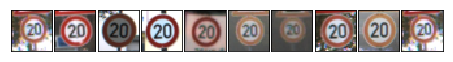

0  samples


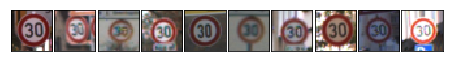

0  samples


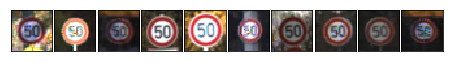

0  samples


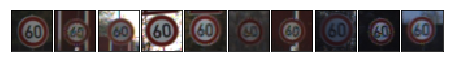

0  samples


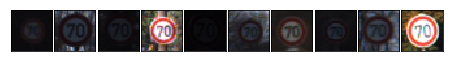

0  samples


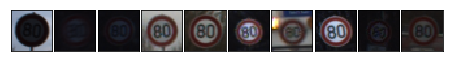

0  samples


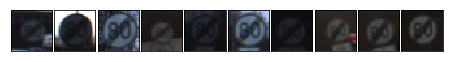

0  samples


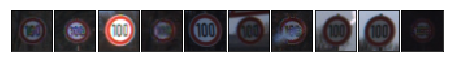

0  samples


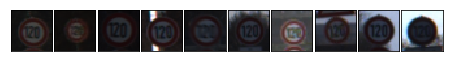

0  samples


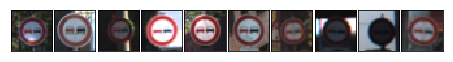

0  samples


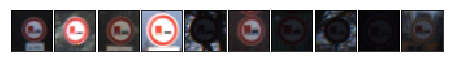

0  samples


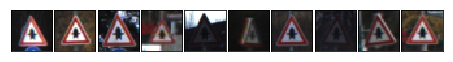

0  samples


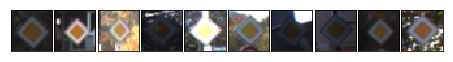

0  samples


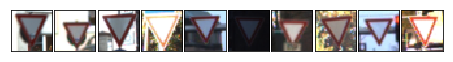

0  samples


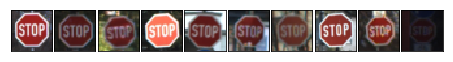

0  samples


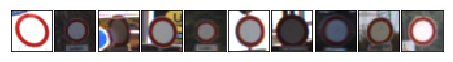

0  samples


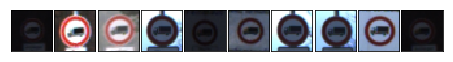

0  samples


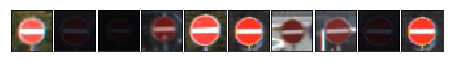

0  samples


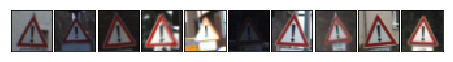

0  samples


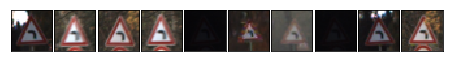

0  samples


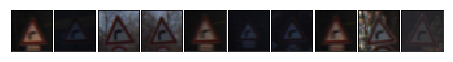

0  samples


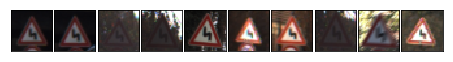

0  samples


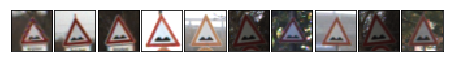

0  samples


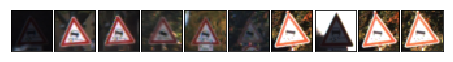

0  samples


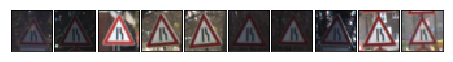

0  samples


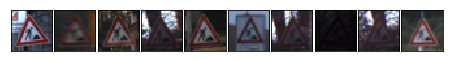

0  samples


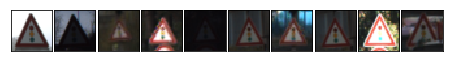

0  samples


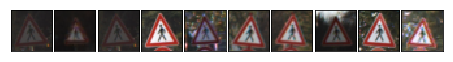

0  samples


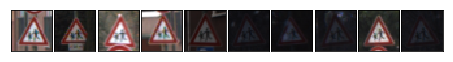

0  samples


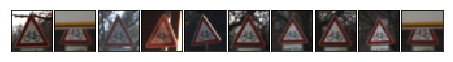

0  samples


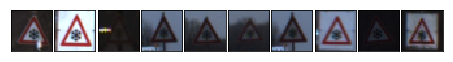

0  samples


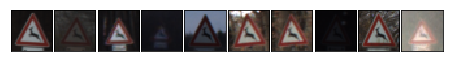

0  samples


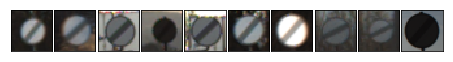

0  samples


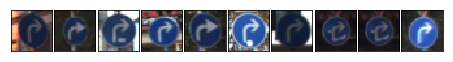

0  samples


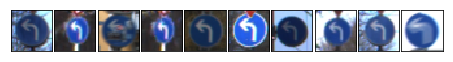

0  samples


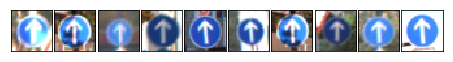

0  samples


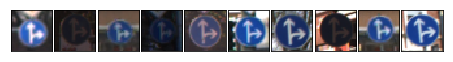

0  samples


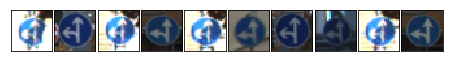

0  samples


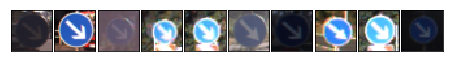

0  samples


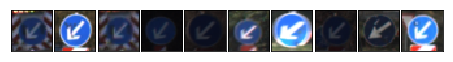

0  samples


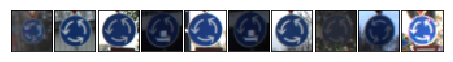

0  samples


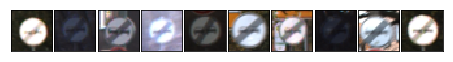

0  samples


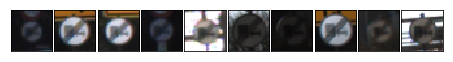

In [6]:
# Plot random samples for each class
origin_random_samples = get_random_samples(X_train, y_train)
plot_random_samples([origin_random_samples])

### Plotting Count of each sign
After plotting, we will notice that training set has bit more than 2000 samples for few labels while validation & training sets have 250 & 800 samples of some labels. 

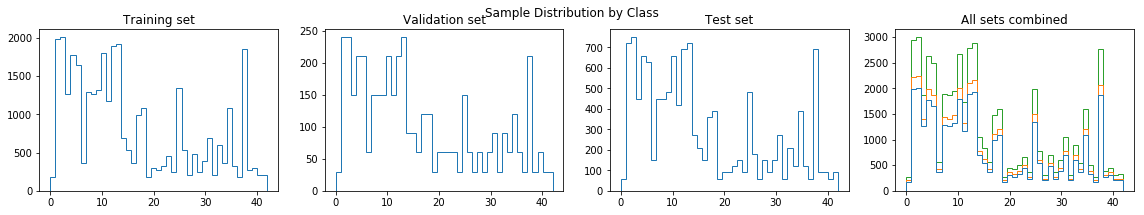

In [7]:
## Plot frequency of each type of traffic sign in the training data.
def hist_labels(datasets=None,ylabels=None):
    
    zero_arr = np.zeros((n_train-y_valid.size), dtype=y_train.dtype)
    zero_arr.fill(-1)
    y_valid_expand = np.concatenate((y_valid,zero_arr), axis=0)
    zero_arr = np.zeros((n_train-y_test.size), dtype=y_test.dtype)
    zero_arr.fill(-1)
    y_test_expand = np.concatenate((y_test,zero_arr), axis=0)
    y_datasets=np.vstack([y_train, y_valid_expand, y_test_expand]).T

    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 3))
    ax0, ax1, ax2, ax3 = axes.flatten()
    colors = ['red', 'tan', 'lime']
    n_bins = np.linspace(0, n_classes-1, n_classes+1)
    
    ax0.hist(datasets[0], bins=n_bins, histtype='step', stacked=True, fill=False)
    ax0.set_title('Training set')
    
    ax1.hist(y_valid_expand, bins=n_bins, histtype='step', stacked=True, fill=False)
    ax1.set_title('Validation set')
    
    ax2.hist(datasets[2], bins=n_bins, histtype='step', stacked=True, fill=False)
    ax2.set_title('Test set')
    
    ax3.hist(y_datasets, bins=n_bins, histtype='step', stacked=True, fill=False)
    ax3.set_title('All sets combined')

    fig.tight_layout()
    plt.suptitle("Sample Distribution by Class")    
    plt.show()

hist_labels(datasets = [y_train, y_valid, y_test],ylabels  = ['train','valid','test'])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

### Preprocess the data here. 
It is required to normalize the data. Other preprocessing steps could include converting to grayscale, etc.
Feel free to use as many code cells as needed.

**Test** different color spaces (yuv, lab, hsv) and apply equalizeHist and createCLAHE
it is apparant that **yuv + CLAHE** is giving better result to improve image clarity

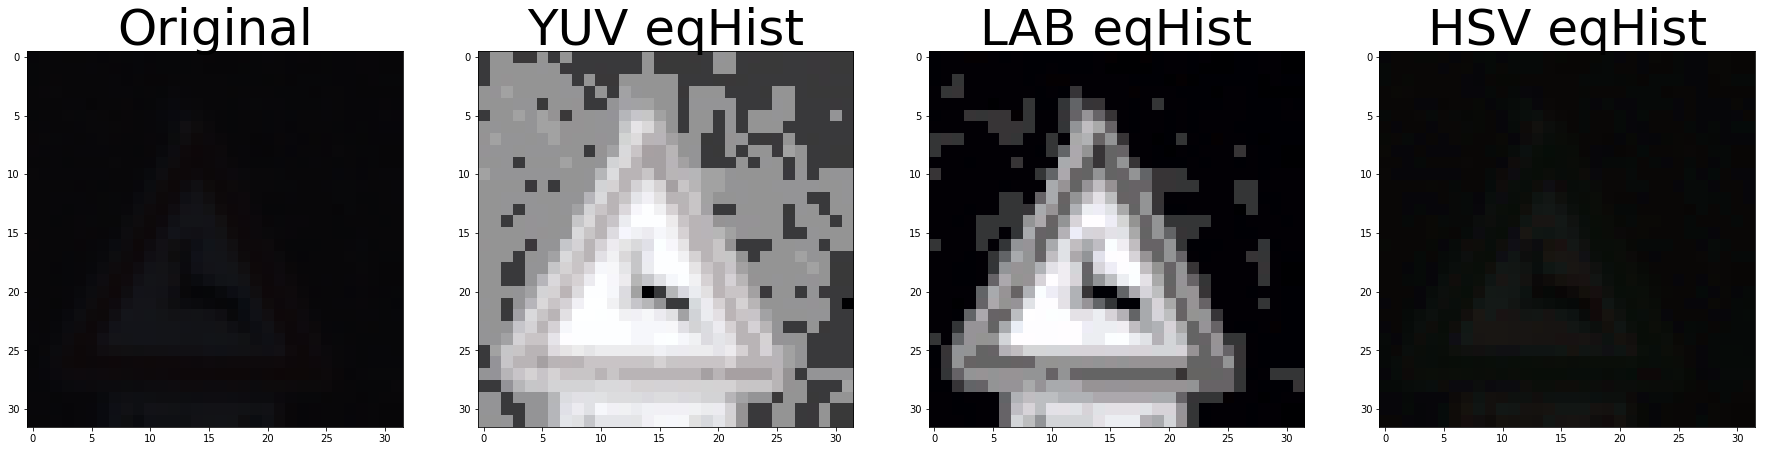

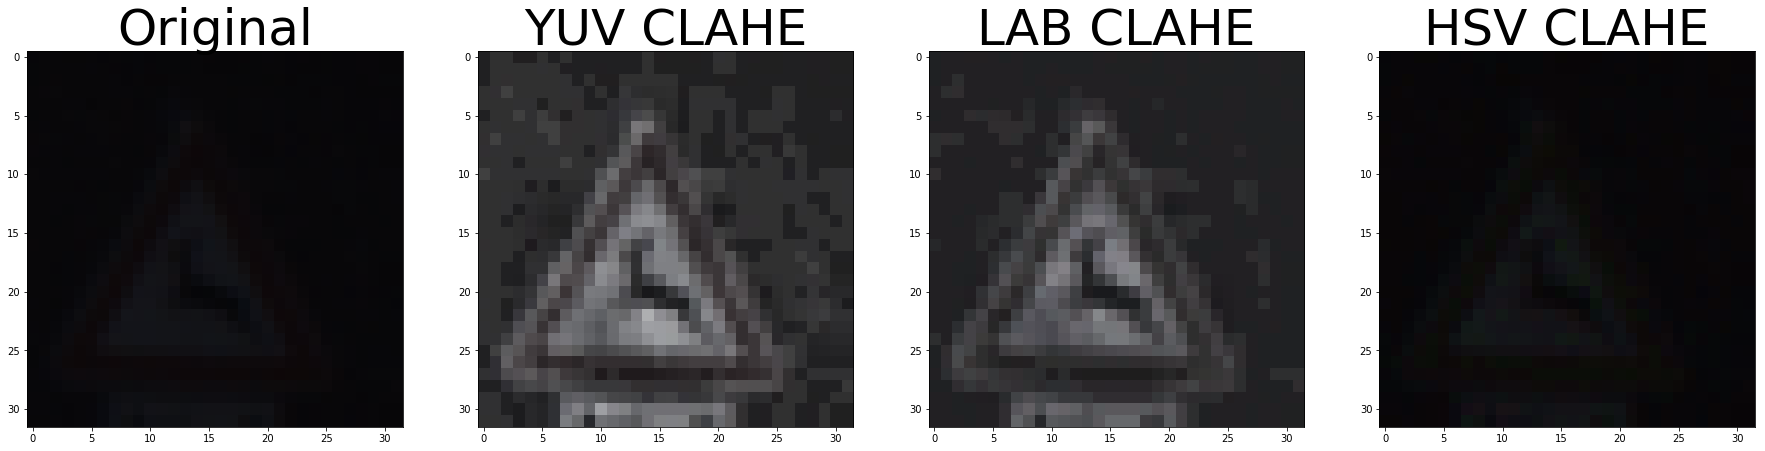

In [8]:
import cv2

def test_differnt_color_spaces(X_train_images):
    img_yuv = cv2.cvtColor(X_train_images, cv2.COLOR_RGB2YUV)
    img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
    img_rgb1 = cv2.cvtColor(img_yuv,cv2.COLOR_YUV2RGB)
    
    img_lab = cv2.cvtColor(X_train_images, cv2.COLOR_RGB2LAB)
    img_lab[:,:,0] = cv2.equalizeHist(img_lab[:,:,0])
    img_rgb2 = cv2.cvtColor(img_lab,cv2.COLOR_LAB2RGB)
    
    img_hsv = cv2.cvtColor(X_train_images, cv2.COLOR_RGB2HSV)
    img_hsv[:,:,0] = cv2.equalizeHist(img_hsv[:,:,0])
    img_rgb3 = cv2.cvtColor(img_hsv,cv2.COLOR_HSV2RGB)
    
    plot_images([X_train_images,img_rgb1,img_rgb2,img_rgb3], ["Original","YUV eqHist","LAB eqHist","HSV eqHist"], [None,None,None,None])
    
    clahe = cv2.createCLAHE(clipLimit=1.0, tileGridSize=(8,8))
    img_yuv = cv2.cvtColor(X_train_images, cv2.COLOR_RGB2YUV)
    img_yuv[:,:,0] = clahe.apply(img_yuv[:,:,0])
    img_rgb1 = cv2.cvtColor(img_yuv,cv2.COLOR_YUV2RGB)
    
    img_lab = cv2.cvtColor(X_train_images, cv2.COLOR_RGB2LAB)
    img_lab[:,:,0] = clahe.apply(img_lab[:,:,0])
    img_rgb2 = cv2.cvtColor(img_lab,cv2.COLOR_LAB2RGB)
    
    img_hsv = cv2.cvtColor(X_train_images, cv2.COLOR_RGB2HSV)
    img_hsv[:,:,0] = clahe.apply(img_hsv[:,:,0])
    img_rgb3 = cv2.cvtColor(img_hsv,cv2.COLOR_HSV2RGB)
    
    plot_images([X_train_images,img_rgb1,img_rgb2,img_rgb3], ["Original","YUV CLAHE","LAB CLAHE","HSV CLAHE"], [None,None,None,None])
    
test_differnt_color_spaces(X_train[350,:,:,:])

(34799, 32, 32, 3)
2496


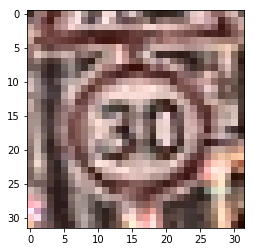

In [4]:
import cv2

def apply_clahe(X, clipLimit=1.0):
    images = X.copy()
    for i in range(images.shape[0]):
        clahe = cv2.createCLAHE(clipLimit=clipLimit, tileGridSize=(8,8))
        img_rgb = images[i,:,:,0:3]
        img_yuv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2YUV)
        img_yuv[:,:,0] = clahe.apply(img_yuv[:,:,0])
        images[i,:,:,:] = cv2.cvtColor(img_yuv,cv2.COLOR_YUV2RGB)
    return images

X_train_clahe = apply_clahe(X_train)
#X_train = None
X_valid_clahe = apply_clahe(X_valid)
#X_valid = None
X_test_clahe  = apply_clahe(X_test)
#X_test = None

print(X_train_clahe.shape)
rnd_id = np.random.randint(0, X_train_clahe.shape[0])
print(rnd_id)
plt.imshow(X_train_clahe[rnd_id])
plt.show()

In [14]:
import cv2
def hist_equalize(X):
    images = X.copy()
    for i in range(images.shape[0]):
        img_rgb = images[i,:,:,:]
        img_yuv = cv2.cvtColor(img_rgb,cv2.COLOR_RGB2YUV)
        img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
        images[i,:,:,:] = cv2.cvtColor(img_yuv,cv2.COLOR_YUV2RGB)
    return images

X_train_eq = hist_equalize(X_train)
X_valid_eq = hist_equalize(X_valid)
X_test_eq  = hist_equalize(X_test)


0  samples


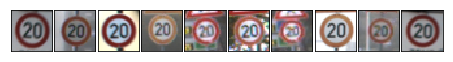

1  samples


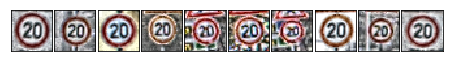

2  samples


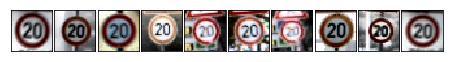

0  samples


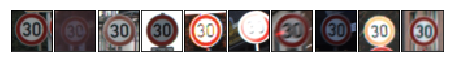

1  samples


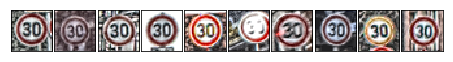

2  samples


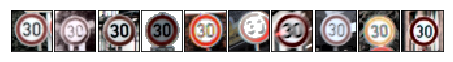

0  samples


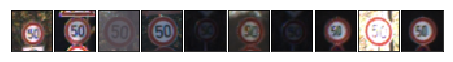

1  samples


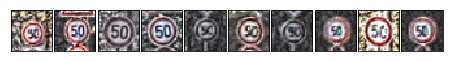

2  samples


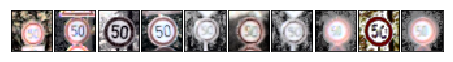

0  samples


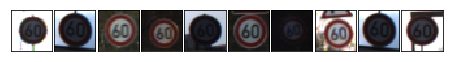

1  samples


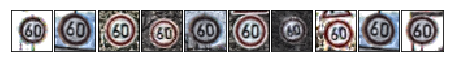

2  samples


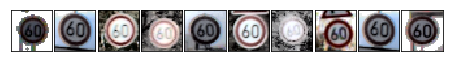

0  samples


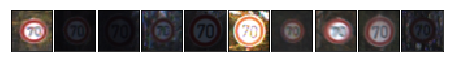

1  samples


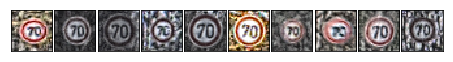

2  samples


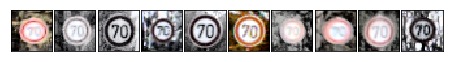

0  samples


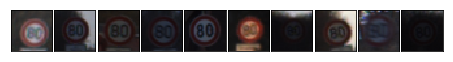

1  samples


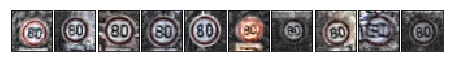

2  samples


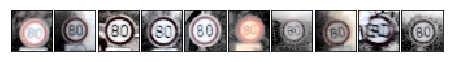

0  samples


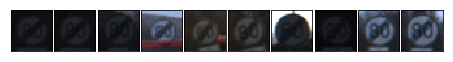

1  samples


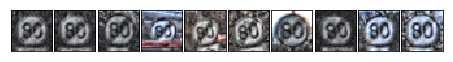

2  samples


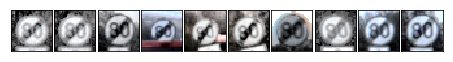

0  samples


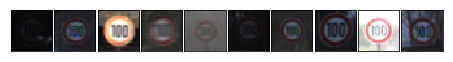

1  samples


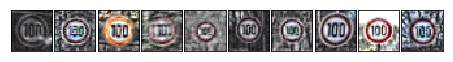

2  samples


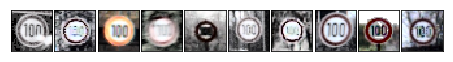

0  samples


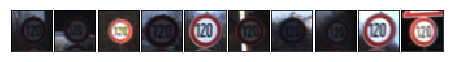

1  samples


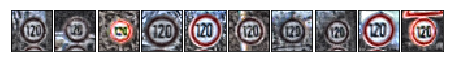

2  samples


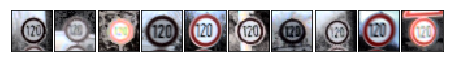

0  samples


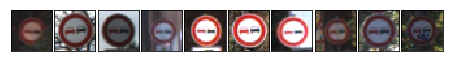

1  samples


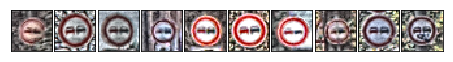

2  samples


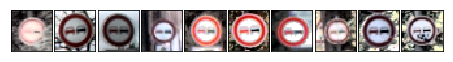

0  samples


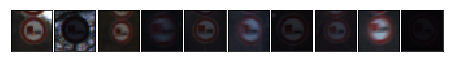

1  samples


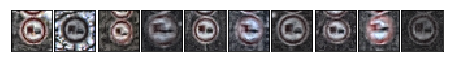

2  samples


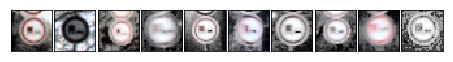

0  samples


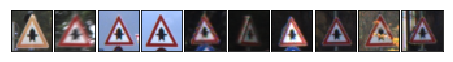

1  samples


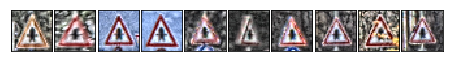

2  samples


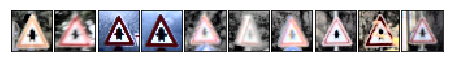

0  samples


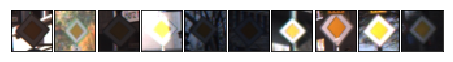

1  samples


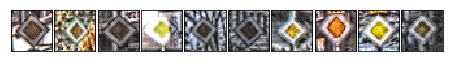

2  samples


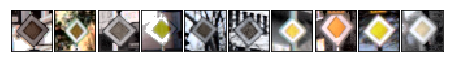

0  samples


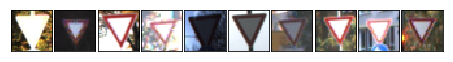

1  samples


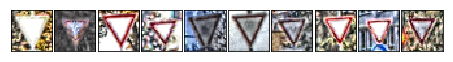

2  samples


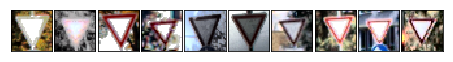

0  samples


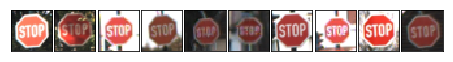

1  samples


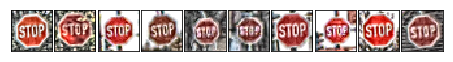

2  samples


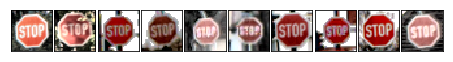

0  samples


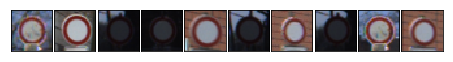

1  samples


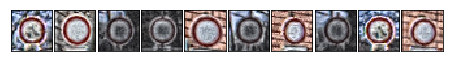

2  samples


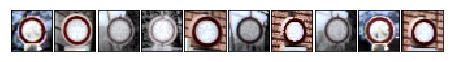

0  samples


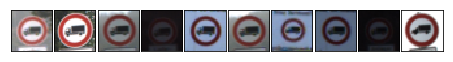

1  samples


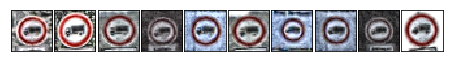

2  samples


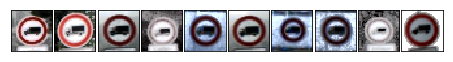

0  samples


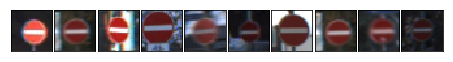

1  samples


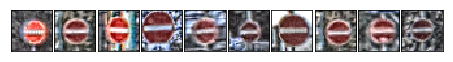

2  samples


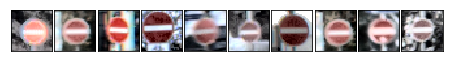

0  samples


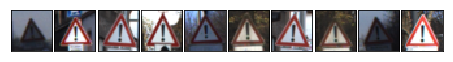

1  samples


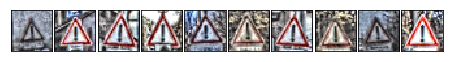

2  samples


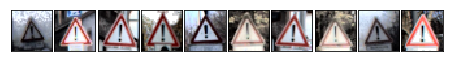

0  samples


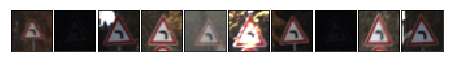

1  samples


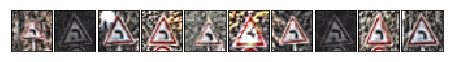

2  samples


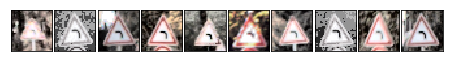

0  samples


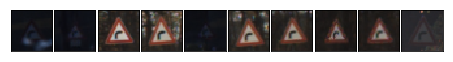

1  samples


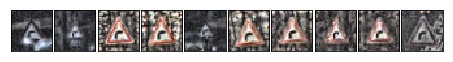

2  samples


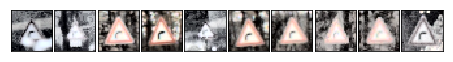

0  samples


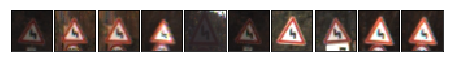

1  samples


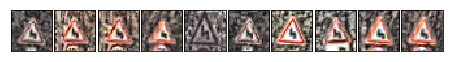

2  samples


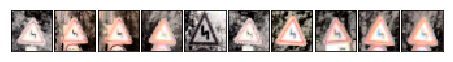

0  samples


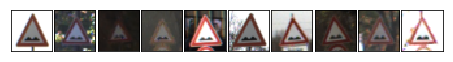

1  samples


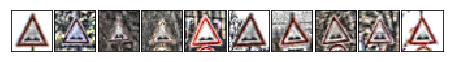

2  samples


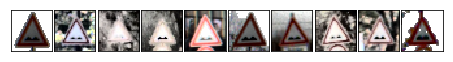

0  samples


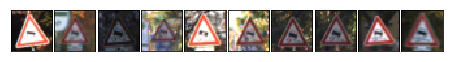

1  samples


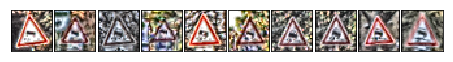

2  samples


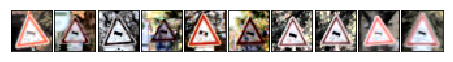

0  samples


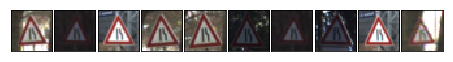

1  samples


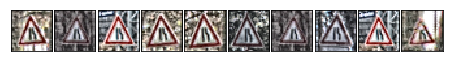

2  samples


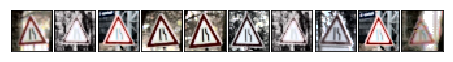

0  samples


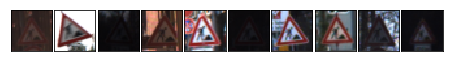

1  samples


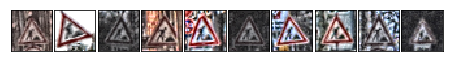

2  samples


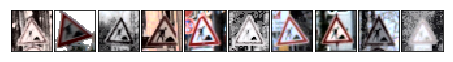

0  samples


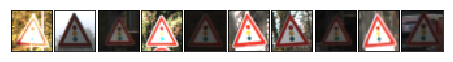

1  samples


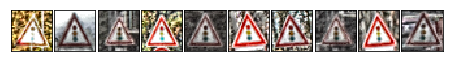

2  samples


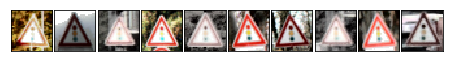

0  samples


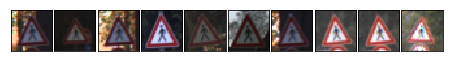

1  samples


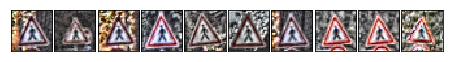

2  samples


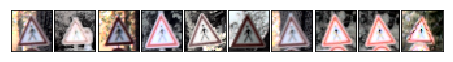

0  samples


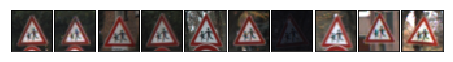

1  samples


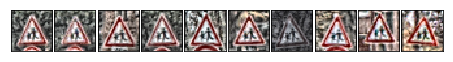

2  samples


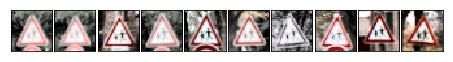

0  samples


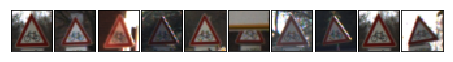

1  samples


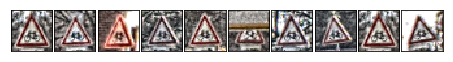

2  samples


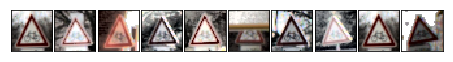

0  samples


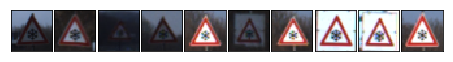

1  samples


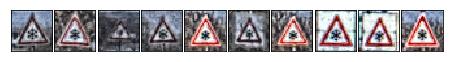

2  samples


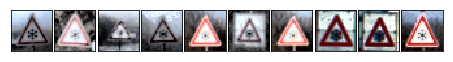

0  samples


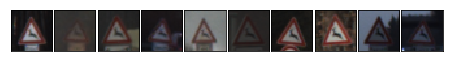

1  samples


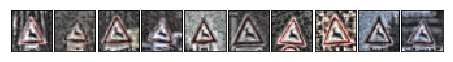

2  samples


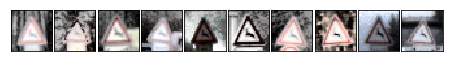

0  samples


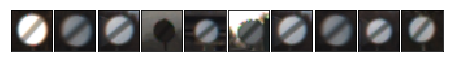

1  samples


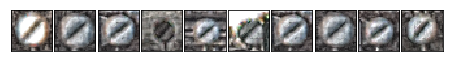

2  samples


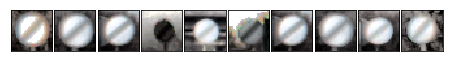

0  samples


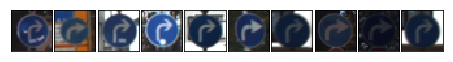

1  samples


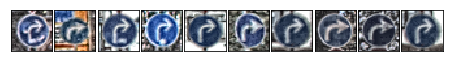

2  samples


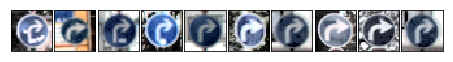

0  samples


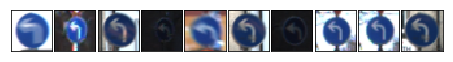

1  samples


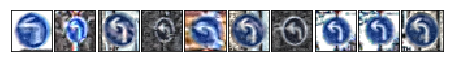

2  samples


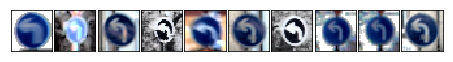

0  samples


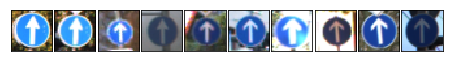

1  samples


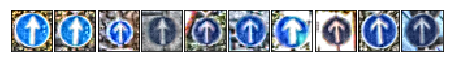

2  samples


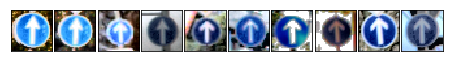

0  samples


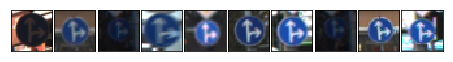

1  samples


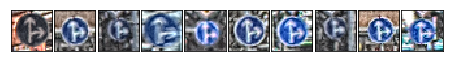

2  samples


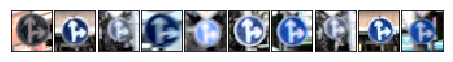

0  samples


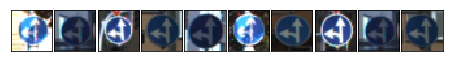

1  samples


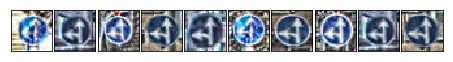

2  samples


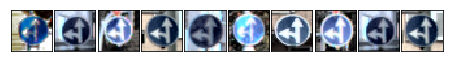

0  samples


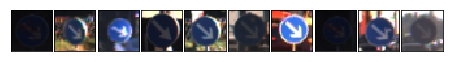

1  samples


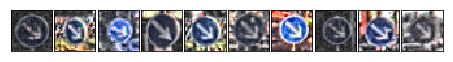

2  samples


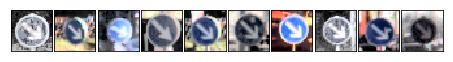

0  samples


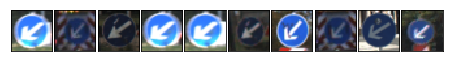

1  samples


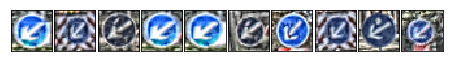

2  samples


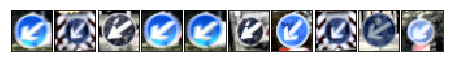

0  samples


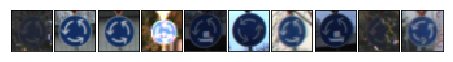

1  samples


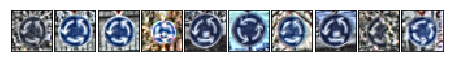

2  samples


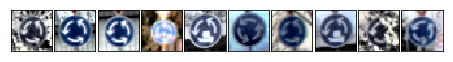

0  samples


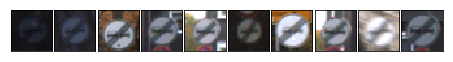

1  samples


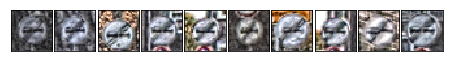

2  samples


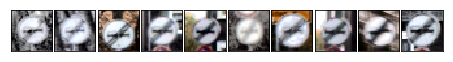

0  samples


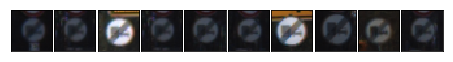

1  samples


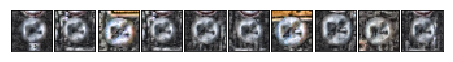

2  samples


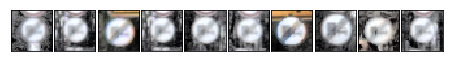

In [140]:
origin_random_samples = get_random_samples(X_train, y_train)

clahe_random_samples = [apply_clahe(item) for item in origin_random_samples]
eq_random_samples = [hist_equalize(item) for item in origin_random_samples]

plot_random_samples([origin_random_samples, clahe_random_samples, eq_random_samples])

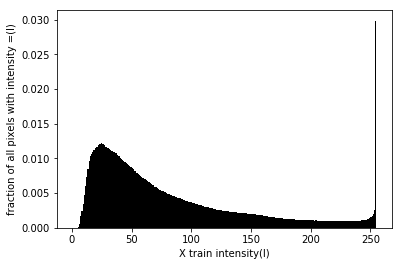

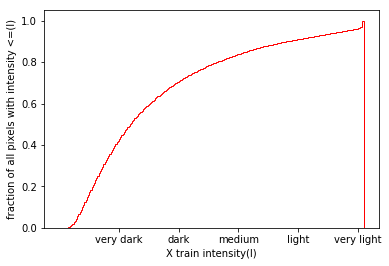

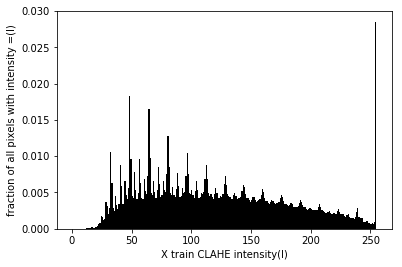

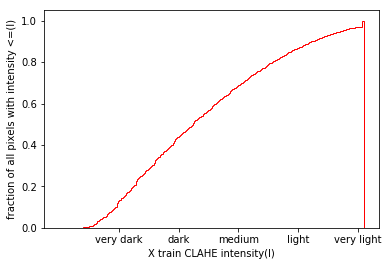

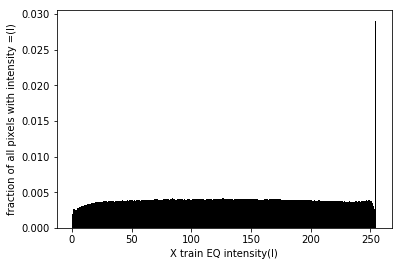

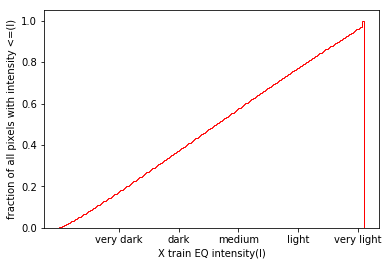

In [30]:
## Plot the histogrm of all images.
## The histogram is computed by averaging pixel intensities over all three channels.
def hist_img_data(X, xlabel = ''):
    plt.hist(np.mean(X,axis=3).flatten(),bins=range(256),color='k',normed=True)
    plt.xlabel(xlabel + ' intensity(I)')
    plt.ylabel('fraction of all pixels with intensity =(I)')
    plt.show()

    plt.hist(np.mean(X,axis=3).flatten(),bins=range(256),color='r',normed=True,cumulative=True, histtype='step')
    plt.xlabel(xlabel + ' intensity(I)')
    plt.xticks([50,100,150,200,250],['very dark', 'dark', 'medium','light','very light'])
    plt.ylabel('fraction of all pixels with intensity <=(I)')
    plt.show()

hist_img_data(X_train.copy(), 'X train')
hist_img_data(X_train_clahe.copy(), 'X train CLAHE')
hist_img_data(X_train_eq.copy(), 'X train EQ')


### Adding more samples to CLAHE processed set
Neural network needs large amount of samples to increase accuracy.
Thus we can add more samples to existing set, to make 6000 of each type of sample.
We will use X_train_clahe set to generate random samples.
I have used 3 variations; position, scale & rotation as suggested in sermanet-ijcnn-11 paper.

In [5]:
import numpy.random as rnd

TARGET_SAMPLE_SIZE_RATIO = 7.5
PERTURBED_POSITION = (-2, 2)
SCALE_RATIO = (0.9,1.1)
ROTATION = (-15, 15)

def jitter_image(image):
    src = image.copy()
    
    (h, w) = src.shape[:2]
    
    position = rnd.uniform(PERTURBED_POSITION[0], PERTURBED_POSITION[1])
    position = abs(position/h)
    scale = rnd.uniform(SCALE_RATIO[0], SCALE_RATIO[1])
    angle = rnd.uniform(ROTATION[0], ROTATION[1])
    
    srcTri = np.array( [[0, 0], [w - 1, 0], [0, h - 1]] ).astype(np.float32)
    dstTri = np.array( [[0, w*position], [w*(1-position), h*position], [w*position, h*(1-position)]] ).astype(np.float32)

    warp_mat = cv2.getAffineTransform(srcTri, dstTri)
    warp_dst = cv2.warpAffine(src, warp_mat, (w, h))
    
    # Rotating the image after Warp
    center = (warp_dst.shape[1]//2, warp_dst.shape[0]//2)
    
    rot_mat = cv2.getRotationMatrix2D( center, angle, scale )
    warp_rotate_dst = cv2.warpAffine(warp_dst, rot_mat, (warp_dst.shape[1], warp_dst.shape[0]))
    
    return warp_rotate_dst

def update_clahe_set(images, labels):
    current_sample_sizes = np.bincount(labels)
    new_size = 0
    for i in range(0, current_sample_sizes.size):
        new_size = new_size + int(current_sample_sizes[i] * TARGET_SAMPLE_SIZE_RATIO)
    (n,x,y,d) = images.shape
    X_train_new_set = np.zeros(shape=[new_size, x,y,d],dtype=images.dtype)
    y_train_new_set = np.zeros(shape=[new_size],dtype=images.dtype)
    
    temp_size = 0
    n_classes = np.unique(labels).shape[0]
    for i_class in range(0, n_classes):
        filtered_labels = (labels==i_class).nonzero()[0]
        filtered_samples = images[filtered_labels]
        diff_size = int(current_sample_sizes[i_class] * TARGET_SAMPLE_SIZE_RATIO)
        target_size = current_sample_sizes[i_class] + diff_size
        print('class:', i_class, ' current size:', current_sample_sizes[i_class], ' diff:', diff_size, ' final size:', target_size)
        for j in range(0, diff_size):
            sample_id = rnd.randint(0,len(filtered_samples), size=1)
            X_train_new_set[temp_size] = jitter_image(filtered_samples[sample_id][0])
            y_train_new_set[temp_size] = i_class
            temp_size = temp_size + 1
    return X_train_new_set, y_train_new_set

34322


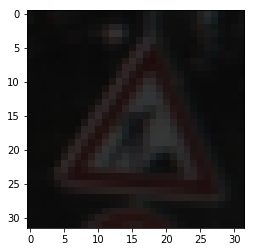

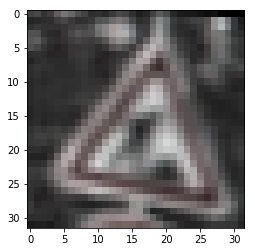

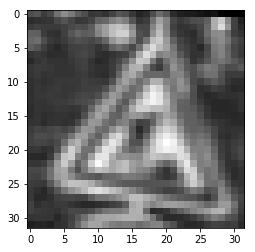

In [17]:
# example of jittered image
rnd_id = np.random.randint(0, X_train_clahe.shape[0])
print(rnd_id)
plt.imshow(X_train[rnd_id])
plt.show()
jit_img = jitter_image(X_train_clahe[rnd_id])
plt.imshow(jit_img)
plt.show()
jit_img_gray = cv2.cvtColor(jit_img, cv2.COLOR_RGB2GRAY)
plt.imshow(jit_img_gray, 'gray')
plt.show()

In [6]:
def get_only_gray_layer(X):
    s1,s2,s3,s4 = X.shape
    X_gray = np.zeros([s1,s2,s3,1], dtype=np.uint8)
    for i,v in enumerate(X):
        gray = cv2.cvtColor(v, cv2.COLOR_RGB2GRAY)
        gray = np.expand_dims(gray, axis=2)
        X_gray[i] = gray
    return X_gray

def save_to_pickle(filename, X):
    dist_pickle_full_set = {}
    dist_pickle_full_set[filename] = X
    pickle.dump( dist_pickle_full_set, open( "data/"+filename+".p", "wb" ) )

In [13]:
import numpy as np

# this needs to be run once. Once file is created execute next block to load from pickle
X_train_clahe_full_set, y_train_full_set = update_clahe_set(X_train_clahe,y_train)

print("X train clahe shape: ",X_train_clahe.shape)
print("X train clahe Full set shape: ",X_train_clahe_full_set.shape)
print("y train shape: ",y_train.shape)
print("y train Full set shape: ",y_train_full_set.shape)

X_train_clahe_full_set = np.vstack((X_train_clahe_full_set,X_train_clahe))
print("Updated X train clahe Full set shape: ",X_train_clahe_full_set.shape)

save_to_pickle("X_train_clahe_full_set", X_train_clahe_full_set)

y_train_full_set = np.hstack((y_train_full_set,y_train))
save_to_pickle("y_train_full_set", y_train_full_set)
print("Updated y train Full set shape: ",y_train_full_set.shape)

X_train_clahe_full_set_gray = get_only_gray_layer(X_train_clahe_full_set)

print("Updated X train clahe Full set gray channel shape: ",X_train_clahe_full_set_gray.shape)
save_to_pickle("X_train_clahe_full_set_gray", X_train_clahe_full_set_gray)

X_valid_clahe_gray = get_only_gray_layer(X_valid_clahe)
X_test_clahe_gray  = get_only_gray_layer(X_test_clahe)
save_to_pickle("X_valid_clahe", X_valid_clahe)
save_to_pickle("X_valid_clahe_gray", X_valid_clahe_gray)
save_to_pickle("X_test_clahe", X_test_clahe)
save_to_pickle("X_test_clahe_gray", X_test_clahe_gray)
print("X Valid clahe", X_valid_clahe.shape)
print("X Valid clahe gray", X_valid_clahe_gray.shape)
print("X Test clahe", X_test_clahe.shape)
print("X Test clahe gray", X_test_clahe_gray.shape)

class: 0  current size: 180  diff: 1350  final size: 1530
class: 1  current size: 1980  diff: 14850  final size: 16830
class: 2  current size: 2010  diff: 15075  final size: 17085
class: 3  current size: 1260  diff: 9450  final size: 10710
class: 4  current size: 1770  diff: 13275  final size: 15045
class: 5  current size: 1650  diff: 12375  final size: 14025
class: 6  current size: 360  diff: 2700  final size: 3060
class: 7  current size: 1290  diff: 9675  final size: 10965
class: 8  current size: 1260  diff: 9450  final size: 10710
class: 9  current size: 1320  diff: 9900  final size: 11220
class: 10  current size: 1800  diff: 13500  final size: 15300
class: 11  current size: 1170  diff: 8775  final size: 9945
class: 12  current size: 1890  diff: 14175  final size: 16065
class: 13  current size: 1920  diff: 14400  final size: 16320
class: 14  current size: 690  diff: 5175  final size: 5865
class: 15  current size: 540  diff: 4050  final size: 4590
class: 16  current size: 360  diff: 

### We generated random samples and now have 7.5 times each type of sample
To keep the ratio between each samples we generated 7.5 times of each type of samples to full set

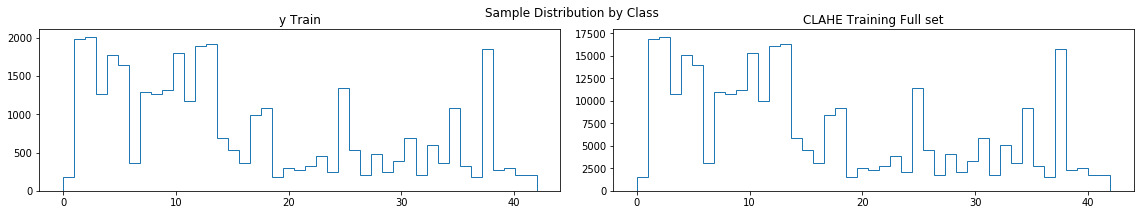

In [53]:
## Plot frequency of each type of traffic sign in the training data.
def hist_labels_full_set(datasets=None,ylabels=None):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 3))
    ax0, ax1 = axes.flatten()
    n_bins = np.linspace(0, n_classes-1, n_classes+1)
    
    ax0.hist(datasets[0], bins=n_bins, histtype='step', stacked=True, fill=False)
    ax0.set_title(ylabels[0])
    
    ax1.hist(datasets[1], bins=n_bins, histtype='step', stacked=True, fill=False)
    ax1.set_title(ylabels[1])
    
    fig.tight_layout()
    plt.suptitle("Sample Distribution by Class")    
    plt.show()

hist_labels_full_set(datasets = [y_train, y_train_full_set],ylabels  = ['y Train', 'CLAHE Training Full set'])

## Start from here to load data from pickle files

In [7]:
# load file from pickle
import pickle
import numpy as np

def load_from_pickle(filename, pickle_key):
    with open(filename, mode='rb') as f:
        dist_pickle = pickle.load(f)
    return dist_pickle[pickle_key]

def add_gray_to_rgb(X_rgb, X_gray):
    return np.concatenate((X_rgb, X_gray), axis=3)

In [8]:
# load X_train_clahe_full_set & X_train_clahe_full_set_gray from pickle
X_train_clahe_full_set = load_from_pickle("data/X_train_clahe_full_set.p", 'X_train_clahe_full_set')
X_train_clahe_full_set_gray = load_from_pickle("data/X_train_clahe_full_set_gray.p", 'X_train_clahe_full_set_gray')
X_train_clahe_full_set_with_gray = add_gray_to_rgb(X_train_clahe_full_set, X_train_clahe_full_set_gray)

# check loaded data
print("Updated X train clahe Full set shape: ",X_train_clahe_full_set.shape)
print("Updated X train clahe Full gray set shape: ",X_train_clahe_full_set_gray.shape)
print("Updated X train clahe Full set with gray shape: ",X_train_clahe_full_set_with_gray.shape)

#X_train_clahe_full_set = None
#X_train_clahe_full_set_gray = None

y_train_full_set = load_from_pickle("data/y_train_full_set.p", 'y_train_full_set')
print("Updated y train Full set shape: ",y_train_full_set.shape)

# load valid & test data

X_valid_clahe = load_from_pickle("data/X_valid_clahe.p", 'X_valid_clahe')
X_valid_clahe_gray = load_from_pickle("data/X_valid_clahe_gray.p", 'X_valid_clahe_gray')
X_valid_clahe_with_gray = add_gray_to_rgb(X_valid_clahe, X_valid_clahe_gray)
print("Updated X valid clahe shape: ",X_valid_clahe.shape)
print("Updated X valid clahe gray shape: ",X_valid_clahe_gray.shape)
print("Updated X valid clahe with gray shape: ",X_valid_clahe_with_gray.shape)
#X_valid_clahe = None
#X_valid_clahe_gray = None

y_valid = load_from_pickle("data/valid.p", 'labels')

X_test_clahe = load_from_pickle("data/X_test_clahe.p", 'X_test_clahe')
X_test_clahe_gray = load_from_pickle("data/X_test_clahe_gray.p", 'X_test_clahe_gray')
X_test_clahe_with_gray = add_gray_to_rgb(X_test_clahe, X_test_clahe_gray)
print("Updated X test clahe shape: ",X_test_clahe.shape)
print("Updated X test clahe gray shape: ",X_test_clahe_gray.shape)
print("Updated X test clahe with gray shape: ",X_test_clahe_with_gray.shape)
#X_test_clahe = None
#X_test_clahe_gray = None

y_test = load_from_pickle("data/test.p", 'labels')

Updated X train clahe Full set shape:  (295791, 32, 32, 3)
Updated X train clahe Full gray set shape:  (295791, 32, 32, 1)
Updated X train clahe Full set with gray shape:  (295791, 32, 32, 4)
Updated y train Full set shape:  (295791,)
Updated X valid clahe shape:  (4410, 32, 32, 3)
Updated X valid clahe gray shape:  (4410, 32, 32, 1)
Updated X valid clahe with gray shape:  (4410, 32, 32, 4)
Updated X test clahe shape:  (12630, 32, 32, 3)
Updated X test clahe gray shape:  (12630, 32, 32, 1)
Updated X test clahe with gray shape:  (12630, 32, 32, 4)


### Model Architecture

In [4]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

## Setup Tensorflow
The `EPOCH` and `BATCH_SIZE` values affect the training speed and model accuracy.

In [10]:
import numpy as np
import tensorflow as tf
from sklearn.utils import shuffle

EPOCHS = 80
BATCH_SIZE = 128

FEATURE_DEPTH = 1
OUTPUT_CLASSES = 43
#DROPOUT_PROBABILITY = 0.3

n_classes = np.unique(y_train_full_set).shape[0]

## SOLUTION: Implement LeNet-5
Implement the [LeNet-5](http://yann.lecun.com/exdb/lenet/) neural network architecture.

This is the only cell you need to edit.
### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since Traffic Signs images are RGB, C is 3 in this case.

### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported for you.

**Layer 3: Fully Connected.** This should have 120 outputs.

**Activation.** Your choice of activation function.

**Layer 4: Fully Connected.** This should have 84 outputs.

**Activation.** Your choice of activation function.

**Layer 5: Fully Connected (Logits).** This should have 10 outputs.

### Output
Return the result of the 2nd fully connected layer.

In [11]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32xFEATURE_DEPTH. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, FEATURE_DEPTH, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID')
    conv1   = tf.nn.bias_add(conv1, conv1_b)

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID')
    conv2   = tf.nn.bias_add(conv2, conv2_b)
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = OUTPUT_CLASSES.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, OUTPUT_CLASSES), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(OUTPUT_CLASSES))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

### Train your model here.
Calculate and report the accuracy on the training and validation set.
Once a final model architecture is selected, 
the accuracy on the test set should be calculated and reported as well.
Feel free to use as many code cells as needed.

In [12]:
x = tf.placeholder(tf.float32, (None, 32, 32, FEATURE_DEPTH))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y,n_classes,on_value=1,off_value=0)
#keep_prob = tf.placeholder(tf.float32)

## Training Pipeline
Create a training pipeline that uses the model to classify MNIST data.

You do not need to modify this section.

In [13]:
rate = 0.0001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

You do not need to modify this section.

In [88]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
predicted_label_operation = tf.arg_max(logits, 1)
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    prediction_matrix = np.zeros_like(y_data)
    labels_matrix = np.zeros_like(y_data)
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
        labels = sess.run(predicted_label_operation, feed_dict={x: batch_x, y: batch_y})
        labels_matrix[offset:offset+BATCH_SIZE] = labels
    return total_accuracy / num_examples, labels_matrix

## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

**Details:** Used 0.0001 learn rate with 130 epochs of 128 batches

With gray images - **97.40%**

With RGB images - **95.7%**

With RGB + gray - **95.4%**

In [15]:
def tf_session_run(X_training_data_set, y_train_full_set, X_validation_data_set, y_valid, sess_name):
    global training_operation
    global evaluate
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        num_examples = len(X_training_data_set)

        print("Training with ", num_examples, " samples...")
        print()
        for i in range(EPOCHS):
            X_training_data_set, y_train_full_set = shuffle(X_training_data_set, y_train_full_set)
            for offset in range(0, num_examples, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = X_training_data_set[offset:end], y_train_full_set[offset:end]
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})

            validation_accuracy = evaluate(X_validation_data_set, y_valid)
            print("EPOCH {} ...".format(i+1))
            print("Validation Accuracy = {:.3f}".format(validation_accuracy))
            print()

        model_path = saver.save(sess, './lenet_' + sess_name + '.ckpt')
        print("Model saved: ", model_path)

In [9]:
# gray only, set FEATURE_DEPTH = 1 accordingly above
tf_session_run(X_train_clahe_full_set_gray, y_train_full_set, X_valid_clahe_gray, y_valid, 'gray')

Training with  295791  samples...

EPOCH 1 ...
Validation Accuracy = 0.652

EPOCH 2 ...
Validation Accuracy = 0.802

EPOCH 3 ...
Validation Accuracy = 0.862

EPOCH 4 ...
Validation Accuracy = 0.894

EPOCH 5 ...
Validation Accuracy = 0.907

EPOCH 6 ...
Validation Accuracy = 0.920

EPOCH 7 ...
Validation Accuracy = 0.927

EPOCH 8 ...
Validation Accuracy = 0.937

EPOCH 9 ...
Validation Accuracy = 0.939

EPOCH 10 ...
Validation Accuracy = 0.940

EPOCH 11 ...
Validation Accuracy = 0.944

EPOCH 12 ...
Validation Accuracy = 0.947

EPOCH 13 ...
Validation Accuracy = 0.943

EPOCH 14 ...
Validation Accuracy = 0.950

EPOCH 15 ...
Validation Accuracy = 0.947

EPOCH 16 ...
Validation Accuracy = 0.954

EPOCH 17 ...
Validation Accuracy = 0.948

EPOCH 18 ...
Validation Accuracy = 0.958

EPOCH 19 ...
Validation Accuracy = 0.958

EPOCH 20 ...
Validation Accuracy = 0.959

EPOCH 21 ...
Validation Accuracy = 0.959

EPOCH 22 ...
Validation Accuracy = 0.960

EPOCH 23 ...
Validation Accuracy = 0.961

EPOCH 24

In [28]:
# gray only, set FEATURE_DEPTH = 1 accordingly above
tf_session_run(X_train_clahe_full_set_gray, y_train_full_set, X_valid_clahe_gray, y_valid, 'gray')

Training with  295791  samples...

EPOCH 1 ...
Validation Accuracy = 0.735

EPOCH 2 ...
Validation Accuracy = 0.830

EPOCH 3 ...
Validation Accuracy = 0.875

EPOCH 4 ...
Validation Accuracy = 0.896

EPOCH 5 ...
Validation Accuracy = 0.901

EPOCH 6 ...
Validation Accuracy = 0.922

EPOCH 7 ...
Validation Accuracy = 0.924

EPOCH 8 ...
Validation Accuracy = 0.931

EPOCH 9 ...
Validation Accuracy = 0.939

EPOCH 10 ...
Validation Accuracy = 0.945

EPOCH 11 ...
Validation Accuracy = 0.946

EPOCH 12 ...
Validation Accuracy = 0.947

EPOCH 13 ...
Validation Accuracy = 0.956

EPOCH 14 ...
Validation Accuracy = 0.954

EPOCH 15 ...
Validation Accuracy = 0.958

EPOCH 16 ...
Validation Accuracy = 0.960

EPOCH 17 ...
Validation Accuracy = 0.958

EPOCH 18 ...
Validation Accuracy = 0.959

EPOCH 19 ...
Validation Accuracy = 0.958

EPOCH 20 ...
Validation Accuracy = 0.956

EPOCH 21 ...
Validation Accuracy = 0.961

EPOCH 22 ...
Validation Accuracy = 0.961

EPOCH 23 ...
Validation Accuracy = 0.958

EPOCH 24

In [38]:
# full set, set FEATURE_DEPTH = 3 accordingly above
tf_session_run(X_train_clahe_full_set, y_train_full_set, X_valid_clahe, y_valid, 'rgb')

Training with  295791  samples...

EPOCH 1 ...
Validation Accuracy = 0.607

EPOCH 2 ...
Validation Accuracy = 0.746

EPOCH 3 ...
Validation Accuracy = 0.810

EPOCH 4 ...
Validation Accuracy = 0.848

EPOCH 5 ...
Validation Accuracy = 0.876

EPOCH 6 ...
Validation Accuracy = 0.886

EPOCH 7 ...
Validation Accuracy = 0.899

EPOCH 8 ...
Validation Accuracy = 0.907

EPOCH 9 ...
Validation Accuracy = 0.907

EPOCH 10 ...
Validation Accuracy = 0.915

EPOCH 11 ...
Validation Accuracy = 0.914

EPOCH 12 ...
Validation Accuracy = 0.915

EPOCH 13 ...
Validation Accuracy = 0.925

EPOCH 14 ...
Validation Accuracy = 0.920

EPOCH 15 ...
Validation Accuracy = 0.924

EPOCH 16 ...
Validation Accuracy = 0.928

EPOCH 17 ...
Validation Accuracy = 0.930

EPOCH 18 ...
Validation Accuracy = 0.934

EPOCH 19 ...
Validation Accuracy = 0.931

EPOCH 20 ...
Validation Accuracy = 0.934

EPOCH 21 ...
Validation Accuracy = 0.937

EPOCH 22 ...
Validation Accuracy = 0.936

EPOCH 23 ...
Validation Accuracy = 0.939

EPOCH 24

In [ ]:
# gray only, set FEATURE_DEPTH = 4 accordingly above
tf_session_run(X_train_clahe_full_set_with_gray, y_train_full_set, X_valid_clahe_with_gray, y_valid, 'rgbgray')

Training with  295791  samples...

EPOCH 1 ...
Validation Accuracy = 0.651

EPOCH 2 ...
Validation Accuracy = 0.810

EPOCH 3 ...
Validation Accuracy = 0.863

EPOCH 4 ...
Validation Accuracy = 0.886

EPOCH 5 ...
Validation Accuracy = 0.909

EPOCH 6 ...
Validation Accuracy = 0.918

EPOCH 7 ...
Validation Accuracy = 0.925

EPOCH 8 ...
Validation Accuracy = 0.928

EPOCH 9 ...
Validation Accuracy = 0.926

EPOCH 10 ...
Validation Accuracy = 0.934

EPOCH 11 ...
Validation Accuracy = 0.927

EPOCH 12 ...
Validation Accuracy = 0.935

EPOCH 13 ...
Validation Accuracy = 0.937

EPOCH 14 ...
Validation Accuracy = 0.940

EPOCH 15 ...
Validation Accuracy = 0.942

EPOCH 16 ...
Validation Accuracy = 0.949

EPOCH 17 ...
Validation Accuracy = 0.944

EPOCH 18 ...
Validation Accuracy = 0.949

EPOCH 19 ...
Validation Accuracy = 0.946

EPOCH 20 ...
Validation Accuracy = 0.948

EPOCH 21 ...
Validation Accuracy = 0.953

EPOCH 22 ...
Validation Accuracy = 0.948

EPOCH 23 ...
Validation Accuracy = 0.945

EPOCH 24

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [94]:
import pandas
signnames = pandas.read_csv('signnames.csv')
signnames = signnames.values
print(signnames)

[[0 'Speed limit (20km/h)']
 [1 'Speed limit (30km/h)']
 [2 'Speed limit (50km/h)']
 [3 'Speed limit (60km/h)']
 [4 'Speed limit (70km/h)']
 [5 'Speed limit (80km/h)']
 [6 'End of speed limit (80km/h)']
 [7 'Speed limit (100km/h)']
 [8 'Speed limit (120km/h)']
 [9 'No passing']
 [10 'No passing for vehicles over 3.5 metric tons']
 [11 'Right-of-way at the next intersection']
 [12 'Priority road']
 [13 'Yield']
 [14 'Stop']
 [15 'No vehicles']
 [16 'Vehicles over 3.5 metric tons prohibited']
 [17 'No entry']
 [18 'General caution']
 [19 'Dangerous curve to the left']
 [20 'Dangerous curve to the right']
 [21 'Double curve']
 [22 'Bumpy road']
 [23 'Slippery road']
 [24 'Road narrows on the right']
 [25 'Road work']
 [26 'Traffic signals']
 [27 'Pedestrians']
 [28 'Children crossing']
 [29 'Bicycles crossing']
 [30 'Beware of ice/snow']
 [31 'Wild animals crossing']
 [32 'End of all speed and passing limits']
 [33 'Turn right ahead']
 [34 'Turn left ahead']
 [35 'Ahead only']
 [36 'Go st

(5, 32, 32, 1)


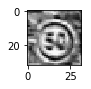

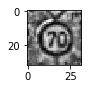

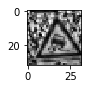

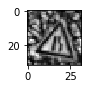

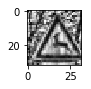

In [17]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2
import glob

online_images = glob.glob("online-samples/*.ppm")
online_image_samples = np.zeros((5,32,32,1), dtype=np.uint8)

# run the CLAHE pipeline processing

for idx, fname in enumerate(online_images):
    plt.figure(figsize=(1,1))
    img_rgb = plt.imread(fname)
    clahe = cv2.createCLAHE(clipLimit=1.0, tileGridSize=(8,8))
    img_yuv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2YUV)
    img_yuv[:,:,0] = clahe.apply(img_yuv[:,:,0])
    image = cv2.cvtColor(img_yuv,cv2.COLOR_YUV2RGB)
    image = cv2.cvtColor(img_yuv,cv2.COLOR_RGB2GRAY)
    plt.imshow(image, 'gray')
    plt.show
    image = np.resize(image, (32,32,1))
    online_image_samples[idx,:,:,:] = image

print(online_image_samples.shape)

### Predict the Sign Type for Each Image
For online test set, 80% accuracy is achieved.
For test set kept aside, 93.4% accuracy is achieved.

In [101]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
#import tensorflow as tf
import numpy as np

online_label_samples = np.zeros((5), dtype=np.uint8)
online_label_samples[0] = 2
online_label_samples[1] = 4
online_label_samples[2] = 23
online_label_samples[3] = 24
online_label_samples[4] = 31

#[labels[2],labels[4],labels[23],labels[24],labels[31]]
online_test_accuracy = 0.0

with tf.Session() as sess:
    #saver = tf.train.import_meta_graph('./lenet_gray.meta')
    #saver.restore(sess, tf.train.latest_checkpoint('.'))
    saver.restore(sess, './lenet_gray.ckpt')

    online_test_accuracy, labels_matrix = evaluate(online_image_samples, online_label_samples)
    print("Test Accuracy = {:.3f}".format(online_test_accuracy))
    print("Labels Matrix = {}".format(labels_matrix))

INFO:tensorflow:Restoring parameters from ./lenet_gray.ckpt
Test Accuracy = 0.800
Labels Matrix = [ 2  4 23 24 29]


In [86]:
# Testing on test data
test_dataset_accuracy = 0.0
with tf.Session() as sess:
    #saver = tf.train.import_meta_graph('./lenet_gray.meta')
    #saver.restore(sess, tf.train.latest_checkpoint('.'))
    saver.restore(sess, './lenet_gray.ckpt')

    test_dataset_accuracy, labels_matrix = evaluate(X_test_clahe_gray, y_test)
    print("Test Accuracy = {:.3f}".format(test_dataset_accuracy))
    print("Labels Matrix = {}".format(labels_matrix))

INFO:tensorflow:Restoring parameters from ./lenet_gray.ckpt
Test Accuracy = 0.934
Labels Matrix = [16  1 38 ..., 11  7 10]


### Analyze Performance

In [87]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
print("Online image Test Accuracy = {:.3f}%".format(online_test_accuracy*100))
print("Test data set Accuracy = {:.3f}%".format(test_dataset_accuracy*100))

Online image Test Accuracy = 80.000%
Test data set Accuracy = 93.436%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [117]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    saver.restore(sess, './lenet_gray.ckpt')
    top5_operation = sess.run(tf.nn.top_k(tf.nn.softmax(logits),5), feed_dict={x:online_image_samples,y:online_label_samples})
    for idx1 in range(0, len(online_label_samples)):
        print("Top 5 Predictions for label: {}".format(signnames[online_label_samples[idx1]]))
        for idx2 in range(0, len(online_label_samples)):
            predicted_label_t5 = signnames[top5_operation[1][idx1][idx2]]
            predicted_acc_t5 = top5_operation[0][idx1][idx2] * 100
            print("    Predicted label: {} with accuracy: {:.6f}%".format(predicted_label_t5, predicted_acc_t5))
        print()


INFO:tensorflow:Restoring parameters from ./lenet_gray.ckpt
Top 5 Predictions for label: [2 'Speed limit (50km/h)']
    Predicted label: [2 'Speed limit (50km/h)'] with accuracy: 99.999928%
    Predicted label: [1 'Speed limit (30km/h)'] with accuracy: 0.000059%
    Predicted label: [5 'Speed limit (80km/h)'] with accuracy: 0.000007%
    Predicted label: [3 'Speed limit (60km/h)'] with accuracy: 0.000001%
    Predicted label: [29 'Bicycles crossing'] with accuracy: 0.000000%

Top 5 Predictions for label: [4 'Speed limit (70km/h)']
    Predicted label: [4 'Speed limit (70km/h)'] with accuracy: 99.999988%
    Predicted label: [15 'No vehicles'] with accuracy: 0.000007%
    Predicted label: [1 'Speed limit (30km/h)'] with accuracy: 0.000000%
    Predicted label: [2 'Speed limit (50km/h)'] with accuracy: 0.000000%
    Predicted label: [0 'Speed limit (20km/h)'] with accuracy: 0.000000%

Top 5 Predictions for label: [23 'Slippery road']
    Predicted label: [23 'Slippery road'] with accurac

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")